In [200]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [201]:
a=pd.read_excel('Capstone_project#.xlsx')

In [202]:
a.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [203]:
a.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [204]:
a.shape

(11260, 19)

In [205]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [206]:
a.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [207]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [208]:
cat=[]
num=[]
for i in a.columns:
    if a[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']
['AccountID', 'Churn', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']


In [209]:
a[cat].describe().T

,count,unique,top,freq
Tenure,11158,38,1,1351
Payment,11151,5,Debit Card,4587
Gender,11152,4,Male,6328
Account_user_count,11148,7,4,4569
account_segment,11163,7,Super,4062
Marital_Status,11048,3,Married,5860
rev_per_month,11158,59,3,1746
rev_growth_yoy,11260,20,14,1524
coupon_used_for_payment,11260,20,1,4373
Day_Since_CC_connect,10903,24,3,1816


In [210]:
dups = a.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [211]:
for col in cat:
    print(col.upper(),': ',a[col].nunique())
    print(a[col].value_counts().sort_values())
    print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
#      116
26     122
27     131
99     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [212]:
a['Tenure']=a['Tenure'].replace('#','1')
a['Account_user_count']=a['Account_user_count'].replace('@','4')
a['rev_per_month']=a['rev_per_month'].replace('+','3')
a['rev_growth_yoy']=a['rev_growth_yoy'].replace('$','14')
a['coupon_used_for_payment']=a['coupon_used_for_payment'].replace('*','1')
a['coupon_used_for_payment']=a['coupon_used_for_payment'].replace('$','1')
a['coupon_used_for_payment']=a['coupon_used_for_payment'].replace('#','1')
a['Day_Since_CC_connect']=a['Day_Since_CC_connect'].replace('$','3')
a['Login_device']=a['Login_device'].replace('&&&&','Mobile')

In [213]:
for col in cat:
    print(col.upper(),': ',a[col].nunique())
    print(a[col].value_counts().sort_values())
    print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
1      116
26     122
27     131
99     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
4     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [214]:
a.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [215]:
a['Tenure'].fillna('1', inplace=True)
a['City_Tier'].fillna('1.0', inplace=True)
a['CC_Contacted_LY'].fillna('16.0', inplace=True)
a['Payment'].fillna('Debit Card', inplace=True)
a['Gender'].fillna('Male', inplace=True)
a['Service_Score'].fillna('3.0', inplace=True)
a['Account_user_count'].fillna('4', inplace=True)
a['account_segment'].fillna('Super', inplace=True)
a['CC_Agent_Score'].fillna('3.0', inplace=True)
a['Marital_Status'].fillna('Married', inplace=True)
a['rev_per_month'].fillna('3', inplace=True)
a['Complain_ly'].fillna('0.0', inplace=True)
a['Day_Since_CC_connect'].fillna('3', inplace=True)
a['cashback'].fillna('155.62', inplace=True)
a['Login_device'].fillna('Mobile', inplace=True)

In [216]:
a.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [217]:
dups = a.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [218]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AccountID                11260 non-null  int64 
 1   Churn                    11260 non-null  int64 
 2   Tenure                   11260 non-null  object
 3   City_Tier                11260 non-null  object
 4   CC_Contacted_LY          11260 non-null  object
 5   Payment                  11260 non-null  object
 6   Gender                   11260 non-null  object
 7   Service_Score            11260 non-null  object
 8   Account_user_count       11260 non-null  object
 9   account_segment          11260 non-null  object
 10  CC_Agent_Score           11260 non-null  object
 11  Marital_Status           11260 non-null  object
 12  rev_per_month            11260 non-null  object
 13  Complain_ly              11260 non-null  object
 14  rev_growth_yoy           11260 non-nul

In [219]:
for col in cat:
    print(col.upper(),': ',a[col].nunique())
    print(a[col].value_counts().sort_values())
    print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
26     122
27     131
99     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
1      218
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6436
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
4     444
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [220]:
a['Tenure'] = a['Tenure'].astype('int')
a['Account_user_count'] = a['Account_user_count'].astype('int')
a['rev_per_month'] = a['rev_per_month'].astype('int')
a['rev_growth_yoy'] = a['rev_growth_yoy'].astype('int')
a['coupon_used_for_payment'] = a['coupon_used_for_payment'].astype('int')
a['Day_Since_CC_connect'] = a['Day_Since_CC_connect'].astype('int')

In [221]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AccountID                11260 non-null  int64 
 1   Churn                    11260 non-null  int64 
 2   Tenure                   11260 non-null  int32 
 3   City_Tier                11260 non-null  object
 4   CC_Contacted_LY          11260 non-null  object
 5   Payment                  11260 non-null  object
 6   Gender                   11260 non-null  object
 7   Service_Score            11260 non-null  object
 8   Account_user_count       11260 non-null  int32 
 9   account_segment          11260 non-null  object
 10  CC_Agent_Score           11260 non-null  object
 11  Marital_Status           11260 non-null  object
 12  rev_per_month            11260 non-null  int32 
 13  Complain_ly              11260 non-null  object
 14  rev_growth_yoy           11260 non-nul

In [222]:
for feature in a.columns: 
    if a[feature].dtype == 'object': 
        print(feature)
        print(a[feature].value_counts())
        print('\n')

City_Tier
1.0    7263
3.0    3405
2.0     480
1.0     112
Name: City_Tier, dtype: int64


CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
16.0     102
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
132.0      1
126.0      1
127.0      1
129.0      1
4.0        1
Name: CC_Contacted_LY, dtype: int64


Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6436
Female    4178
M          376
F          270
Name: Gender, dtype: int64


Service_Scor

In [223]:
cat=[]
num=[]
for i in a.columns:
    if a[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'cashback', 'Login_device']
['AccountID', 'Churn', 'Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect']


In [224]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
Tenure,11260.0,10.830995,12.829072,0.0,2.00,8.0,16.00,99.0
Account_user_count,11260.0,3.704973,1.004383,1.0,3.00,4.0,4.00,6.0
rev_per_month,11260.0,6.126377,11.515823,1.0,3.00,4.0,7.00,140.0
rev_growth_yoy,11260.0,16.192806,3.757391,4.0,13.00,15.0,19.00,28.0
coupon_used_for_payment,11260.0,1.790409,1.969331,0.0,1.00,1.0,2.00,16.0
Day_Since_CC_connect,11260.0,4.581261,3.649643,0.0,2.00,3.0,7.00,47.0


In [225]:
a[cat].describe().T

,count,unique,top,freq
City_Tier,11260,4,1,7263
CC_Contacted_LY,11260,45,14,682
Payment,11260,5,Debit Card,4696
Gender,11260,4,Male,6436
Service_Score,11260,7,3,5490
account_segment,11260,7,Super,4159
CC_Agent_Score,11260,6,3,3360
Marital_Status,11260,3,Married,6072
Complain_ly,11260,3,0,7792
cashback,11260,5694,155.62,471


In [226]:
a['account_segment']=a['account_segment'].replace('Regular +','Regular Plus')
a['account_segment']=a['account_segment'].replace('Super +','Super Plus')
a['Gender']=a['Gender'].replace('M','Male')
a['Gender']=a['Gender'].replace('F','Female')

In [227]:
for feature in a.columns: 
    if a[feature].dtype == 'object': 
        print(feature)
        print(a[feature].value_counts())
        print('\n')

City_Tier
1.0    7263
3.0    3405
2.0     480
1.0     112
Name: City_Tier, dtype: int64


CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
16.0     102
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
132.0      1
126.0      1
127.0      1
129.0      1
4.0        1
Name: CC_Contacted_LY, dtype: int64


Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6812
Female    4448
Name: Gender, dtype: int64


Service_Score
3.0    5490
2.0    3251
4.0 

In [228]:
import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

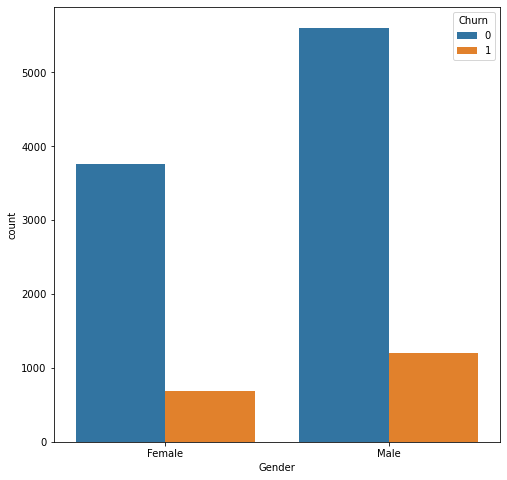

In [229]:
plt.figure(figsize=(8,8))
sns.countplot(a['Gender'],hue=a['Churn']) 

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

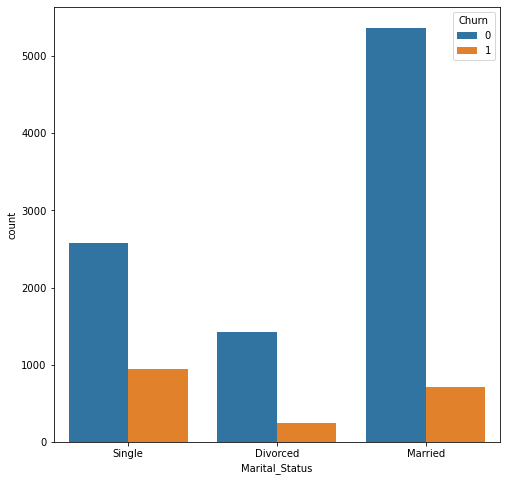

In [230]:
plt.figure(figsize=(8,8))
sns.countplot(a['Marital_Status'],hue=a['Churn']) 

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Tier', ylabel='count'>

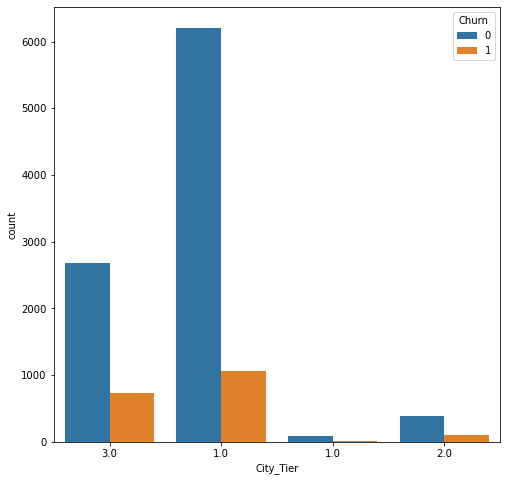

In [231]:
plt.figure(figsize=(8,8))
sns.countplot(a['City_Tier'],hue=a['Churn']) 

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Service_Score', ylabel='count'>

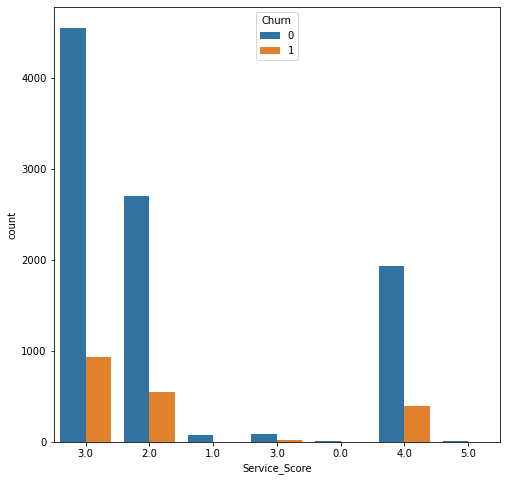

In [232]:
plt.figure(figsize=(8,8))
sns.countplot(a['Service_Score'],hue=a['Churn']) 

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='account_segment', ylabel='count'>

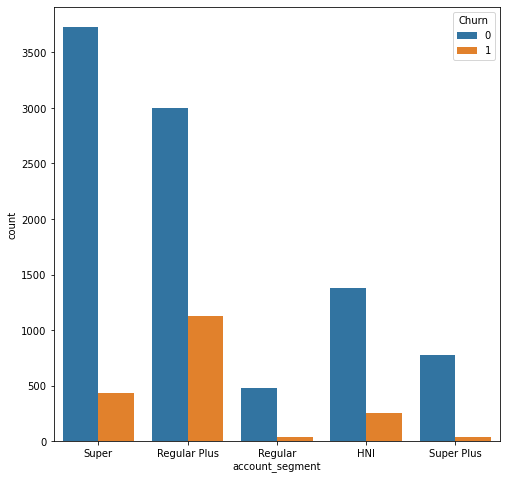

In [233]:
plt.figure(figsize=(8,8))
sns.countplot(a['account_segment'],hue=a['Churn']) 

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Login_device', ylabel='count'>

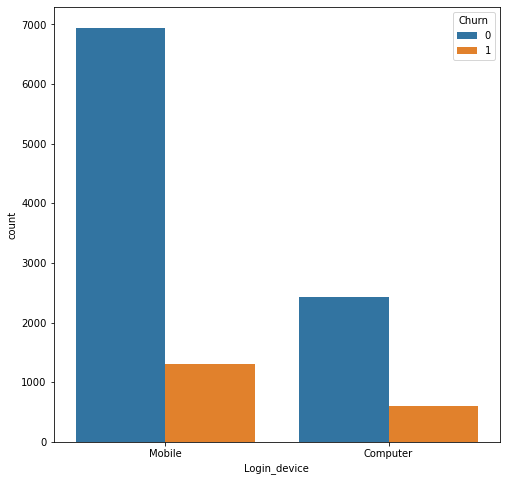

In [234]:
plt.figure(figsize=(8,8))
sns.countplot(a['Login_device'],hue=a['Churn'])

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

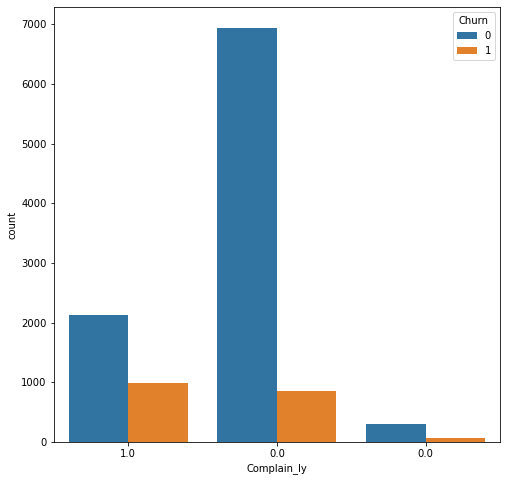

In [235]:
plt.figure(figsize=(8,8))
sns.countplot(a['Complain_ly'],hue=a['Churn'])

E:\ssc_je\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ssc_je\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ssc_je\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

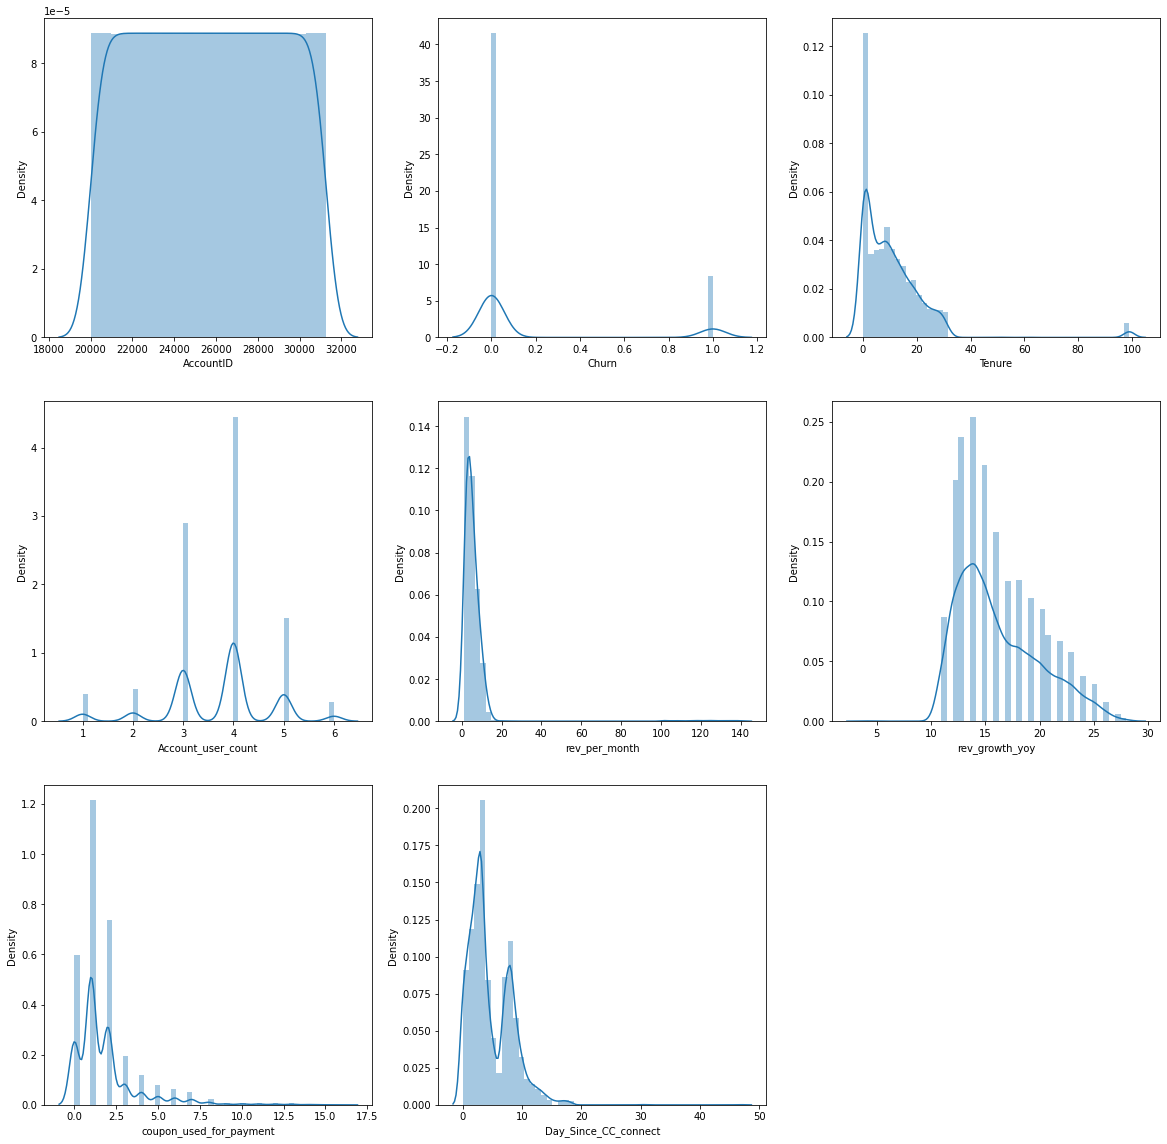

In [236]:
plt.figure(figsize=[20,20]) 
for i in range(len(num)):    #univariate visualisation through histogram.
    plt.subplot(3,3,i+1)
    sns.distplot(a[num[i]])

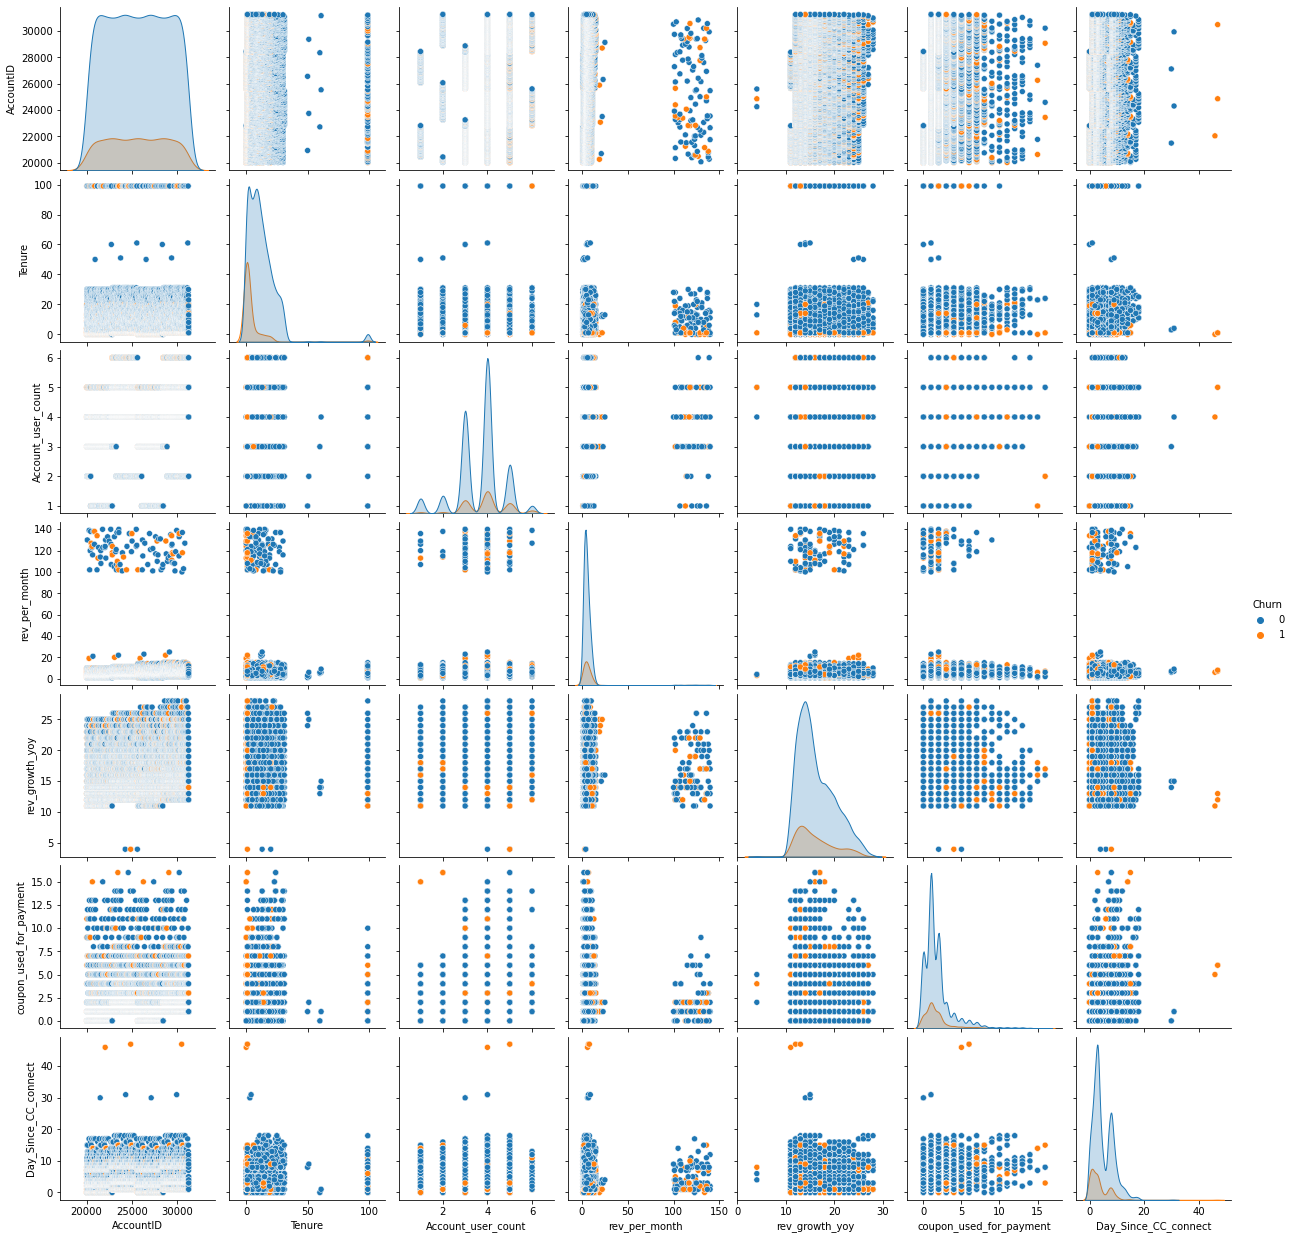

In [237]:
sns.pairplot(a,diag_kind='kde',hue='Churn') # pairplot for multivariate visualisation.

<AxesSubplot:>

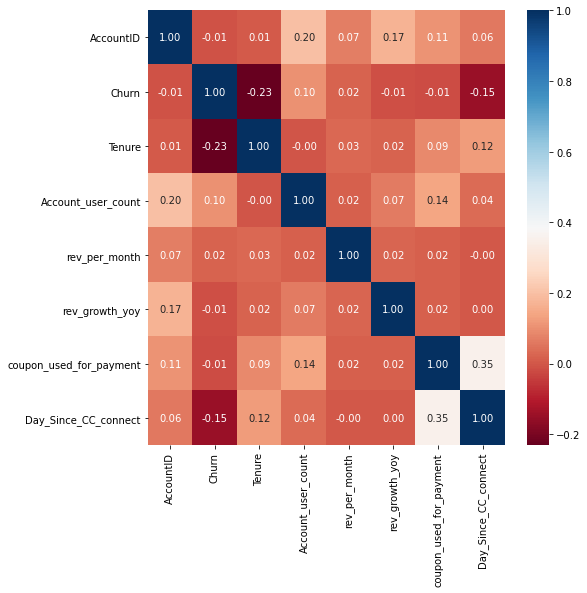

In [238]:
plt.figure(figsize=(8,8))
sns.heatmap(a.corr(), annot=True, fmt='.2f', cmap='RdBu')

In [239]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AccountID                11260 non-null  int64 
 1   Churn                    11260 non-null  int64 
 2   Tenure                   11260 non-null  int32 
 3   City_Tier                11260 non-null  object
 4   CC_Contacted_LY          11260 non-null  object
 5   Payment                  11260 non-null  object
 6   Gender                   11260 non-null  object
 7   Service_Score            11260 non-null  object
 8   Account_user_count       11260 non-null  int32 
 9   account_segment          11260 non-null  object
 10  CC_Agent_Score           11260 non-null  object
 11  Marital_Status           11260 non-null  object
 12  rev_per_month            11260 non-null  int32 
 13  Complain_ly              11260 non-null  object
 14  rev_growth_yoy           11260 non-nul

In [240]:
b=a.drop('AccountID',axis=1)

In [241]:
b.shape

(11260, 18)

In [242]:
cat=[]
num=[]
for i in b.columns:
    if b[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'cashback', 'Login_device']
['Churn', 'Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect']


In [243]:
for feature in b.columns: 
    if b[feature].dtype == 'object': 
        print(feature)
        print(b[feature].value_counts())
        print('\n')

City_Tier
1.0    7263
3.0    3405
2.0     480
1.0     112
Name: City_Tier, dtype: int64


CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
16.0     102
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
132.0      1
126.0      1
127.0      1
129.0      1
4.0        1
Name: CC_Contacted_LY, dtype: int64


Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6812
Female    4448
Name: Gender, dtype: int64


Service_Score
3.0    5490
2.0    3251
4.0 

In [244]:
b.shape

(11260, 18)

In [245]:
c=b.drop('cashback',axis=1)

In [246]:
c.shape

(11260, 17)

In [247]:
for feature in c.columns: 
    if c[feature].dtype == 'object': 
        print(feature)
        print(c[feature].value_counts())
        print('\n')

City_Tier
1.0    7263
3.0    3405
2.0     480
1.0     112
Name: City_Tier, dtype: int64


CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
16.0     102
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
132.0      1
126.0      1
127.0      1
129.0      1
4.0        1
Name: CC_Contacted_LY, dtype: int64


Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6812
Female    4448
Name: Gender, dtype: int64


Service_Score
3.0    5490
2.0    3251
4.0 

In [248]:
d=c.drop('CC_Contacted_LY',axis=1)

In [249]:
d.shape

(11260, 16)

In [250]:
for feature in d.columns: 
    if d[feature].dtype == 'object': 
        print(feature)
        print(d[feature].value_counts())
        print('\n')

City_Tier
1.0    7263
3.0    3405
2.0     480
1.0     112
Name: City_Tier, dtype: int64


Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6812
Female    4448
Name: Gender, dtype: int64


Service_Score
3.0    5490
2.0    3251
4.0    2331
3.0      98
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64


account_segment
Super           4159
Regular Plus    4124
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64


CC_Agent_Score
3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
3.0     116
Name: CC_Agent_Score, dtype: int64


Marital_Status
Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


Complain_ly
0.0    7792
1.0    3111
0.0     357
Name: Complain_ly, dtype: int64


Login_device
Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

In [251]:
cat=[]
num=[]
for i in d.columns:
    if d[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']
['Churn', 'Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect']


E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ssc_je\anaconda\lib\site-packages\seaborn\_dec

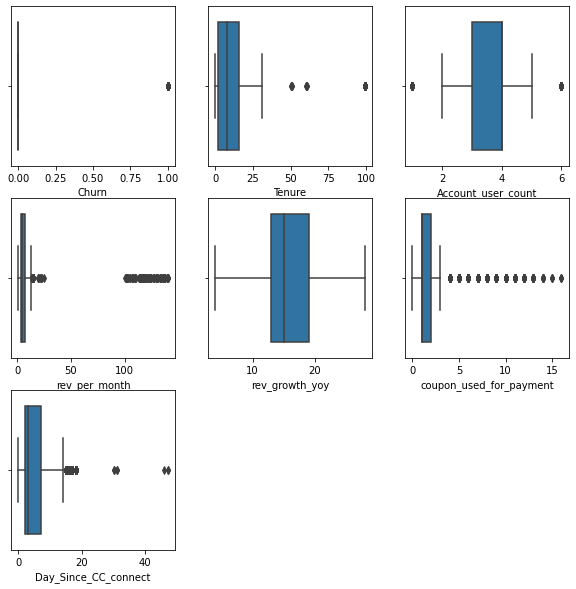

In [252]:
columns=['Churn', 'Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect']                                                              
plt.figure(figsize=[10,10])                  
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(d[columns[i]]) 

In [253]:
col=['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect']

In [254]:
def remove_outlier(col):  #outliers treatment through IQR method.
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [255]:
for i in col:
    lower,upper=remove_outlier(d[i])
    d[i]=np.where(d[i]>upper,upper,d[i])
    d[i]=np.where(d[i]<lower,lower,d[i])

E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ssc_je\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ssc_je\anaconda\lib\site-packages\seaborn\_dec

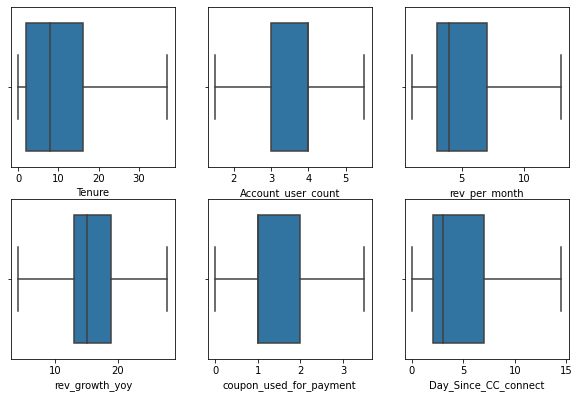

In [256]:
columns=['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect']                                                              
plt.figure(figsize=[10,10])                  
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(d[columns[i]]) 

In [257]:
d.head()

,Churn,Tenure,City_Tier,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,Login_device
0,1,4.0,3,Debit Card,Female,3,3.0,Super,2,Single,9.0,1,11.0,1.0,5.0,Mobile
1,1,0.0,1,UPI,Male,3,4.0,Regular Plus,3,Single,7.0,1,15.0,0.0,0.0,Mobile
2,1,0.0,1,Debit Card,Male,2,4.0,Regular Plus,3,Single,6.0,1,14.0,0.0,3.0,Mobile
3,1,0.0,3,Debit Card,Male,2,4.0,Super,5,Single,8.0,0,23.0,0.0,3.0,Mobile
4,1,0.0,1,Credit Card,Male,2,3.0,Regular Plus,5,Single,3.0,0,11.0,1.0,3.0,Mobile


In [258]:
d.shape

(11260, 16)

In [259]:
for feature in d.columns: 
    if d[feature].dtype == 'object': 
        print(feature)
        print(d[feature].value_counts())
        print('\n')

City_Tier
1.0    7263
3.0    3405
2.0     480
1.0     112
Name: City_Tier, dtype: int64


Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6812
Female    4448
Name: Gender, dtype: int64


Service_Score
3.0    5490
2.0    3251
4.0    2331
3.0      98
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64


account_segment
Super           4159
Regular Plus    4124
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64


CC_Agent_Score
3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
3.0     116
Name: CC_Agent_Score, dtype: int64


Marital_Status
Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


Complain_ly
0.0    7792
1.0    3111
0.0     357
Name: Complain_ly, dtype: int64


Login_device
Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

In [260]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  object 
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Service_Score            11260 non-null  object 
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  object 
 8   CC_Agent_Score           11260 non-null  object 
 9   Marital_Status           11260 non-null  object 
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  object 
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [261]:
d['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [262]:
for feature in d.columns: 
    if d[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(d[feature].unique()))
        print(pd.Categorical(d[feature].unique()).codes)
        d[feature] = pd.Categorical(d[feature]).codes



feature: City_Tier
[3, 1, '1.0', 2]
Categories (4, object): [1, 2, 3, '1.0']
[2 0 3 1]


feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: Service_Score
[3, 2, 1, '3.0', 0, 4, 5]
Categories (7, object): [0, 1, 2, 3, 4, 5, '3.0']
[3 2 1 6 0 4 5]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
Categories (5, object): ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[3 2 1 0 4]


feature: CC_Agent_Score
[2, 3, 5, 4, '3.0', 1]
Categories (6, object): [1, 2, 3, 4, 5, '3.0']
[1 2 4 3 5 0]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 0 1]


feature: Complain_ly
[1, 0, '0.0']
Categories (3, object): [0, 1, '0.0']
[1 0 2]


feature: Login_

In [263]:
d.head()

,Churn,Tenure,City_Tier,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,Login_device
0,1,4.0,2,2,0,3,3.0,3,1,2,9.0,1,11.0,1.0,5.0,1
1,1,0.0,0,4,1,3,4.0,2,2,2,7.0,1,15.0,0.0,0.0,1
2,1,0.0,0,2,1,2,4.0,2,2,2,6.0,1,14.0,0.0,3.0,1
3,1,0.0,2,2,1,2,4.0,3,4,2,8.0,0,23.0,0.0,3.0,1
4,1,0.0,0,1,1,2,3.0,2,4,2,3.0,0,11.0,1.0,3.0,1


In [264]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  int8   
 3   Payment                  11260 non-null  int8   
 4   Gender                   11260 non-null  int8   
 5   Service_Score            11260 non-null  int8   
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  int8   
 8   CC_Agent_Score           11260 non-null  int8   
 9   Marital_Status           11260 non-null  int8   
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  int8   
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [265]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [266]:
x=d.drop('Churn',axis=1)
y=d['Churn']

In [267]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=y)

In [268]:
y_train.value_counts()

0    6555
1    1327
Name: Churn, dtype: int64

In [269]:
y_test.value_counts()

0    2809
1     569
Name: Churn, dtype: int64

In [270]:
x_train.head()

,Tenure,City_Tier,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,Login_device
799,8.0,0,2,1,3,3.0,2,2,0,1.0,1,14.0,1.0,2.0,1
7530,2.0,2,3,1,2,3.0,2,3,1,3.0,0,15.0,2.0,2.0,1
6908,12.0,2,3,1,3,3.0,4,4,2,5.0,0,13.0,3.5,10.0,1
3251,26.0,2,3,1,3,4.0,4,4,0,3.0,0,12.0,2.0,14.5,1
5553,1.0,2,3,1,3,4.0,3,0,2,3.0,0,15.0,2.0,8.0,1


In [271]:
from sklearn.preprocessing import MinMaxScaler #scaling the data after split with minmaxscalar only for the continuous and ordinal variables to keep all the independent variables in range of 0 to 1.
sc=MinMaxScaler()

In [272]:
x_train_scaled=sc.fit_transform(x_train.iloc[:,:]) #applying fit_transform on training data(only independent variables as the dependent variable is already from 0 to 1)
x_train_scaled

array([[0.21621622, 0.        , 0.5       , ..., 0.28571429, 0.13793103,
        1.        ],
       [0.05405405, 0.66666667, 0.75      , ..., 0.57142857, 0.13793103,
        1.        ],
       [0.32432432, 0.66666667, 0.75      , ..., 1.        , 0.68965517,
        1.        ],
       ...,
       [0.02702703, 0.66666667, 0.        , ..., 0.57142857, 0.20689655,
        0.        ],
       [0.7027027 , 0.        , 0.25      , ..., 0.28571429, 0.20689655,
        1.        ],
       [0.37837838, 0.        , 0.        , ..., 1.        , 0.34482759,
        0.        ]])

In [273]:
x_test_scaled=sc.transform(x_test.iloc[:,:]) #appling only transform on test data to prevent any data leakage.
x_test_scaled

array([[0.24324324, 0.        , 0.5       , ..., 0.28571429, 0.13793103,
        0.        ],
       [0.54054054, 0.        , 1.        , ..., 0.85714286, 0.        ,
        1.        ],
       [0.21621622, 0.        , 0.5       , ..., 0.57142857, 0.13793103,
        0.        ],
       ...,
       [0.27027027, 0.        , 0.25      , ..., 0.57142857, 0.48275862,
        1.        ],
       [0.02702703, 0.        , 0.25      , ..., 0.        , 0.13793103,
        1.        ],
       [0.24324324, 0.        , 0.5       , ..., 1.        , 0.27586207,
        1.        ]])

In [274]:
d['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [275]:
!pip install imbalanced-learn

In [276]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt   
import matplotlib.style

## Logistic Regression

In [277]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [278]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    9.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [279]:
ytrain_predict = model.predict(x_train_scaled)
ytest_predict = model.predict(x_test_scaled)

In [280]:
ytest_predict_prob=model.predict_proba(x_test_scaled)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.914420,0.085580
1,0.944323,0.055677
2,0.863634,0.136366
3,0.928757,0.071243
4,0.886794,0.113206


#### AUC and ROC for the training data

AUC: 0.751


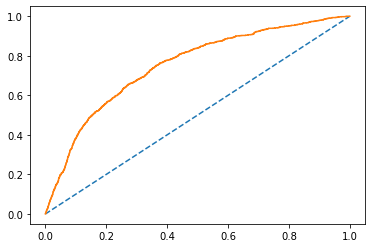

In [281]:
# predict probabilities
probs = model.predict_proba(x_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC for the test data

AUC: 0.751


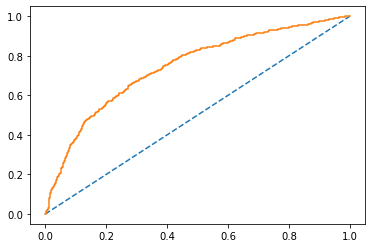

In [282]:
# predict probabilities
probs = model.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

In [283]:
confusion_matrix(y_train, ytrain_predict)

array([[6555,    0],
       [1327,    0]], dtype=int64)

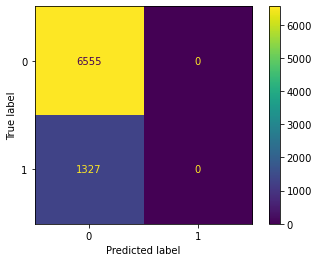

In [284]:
plot_confusion_matrix(model,x_train_scaled,y_train);

In [285]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6555
           1       0.00      0.00      0.00      1327

    accuracy                           0.83      7882
   macro avg       0.42      0.50      0.45      7882
weighted avg       0.69      0.83      0.76      7882



E:\ssc_je\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix for test data

In [286]:
confusion_matrix(y_test, ytest_predict)

array([[2809,    0],
       [ 569,    0]], dtype=int64)

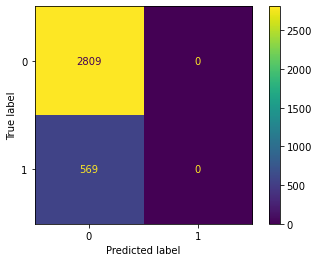

In [287]:
plot_confusion_matrix(model,x_test_scaled,y_test);

In [288]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2809
           1       0.00      0.00      0.00       569

    accuracy                           0.83      3378
   macro avg       0.42      0.50      0.45      3378
weighted avg       0.69      0.83      0.76      3378



E:\ssc_je\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Applying GridSearchCV for Logistic Regression

In [289]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [290]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [291]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [292]:
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [293]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [294]:
best_model = grid_search.best_estimator_

In [295]:
ytrain_predict = best_model.predict(x_train_scaled)
ytest_predict = best_model.predict(x_test_scaled)

In [296]:
ytest_predict_prob=best_model.predict_proba(x_test_scaled)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.975932,0.024068
1,0.996889,0.003111
2,0.862670,0.137330
3,0.988176,0.011824
4,0.501803,0.498197


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.72      0.41      0.52      1327

    accuracy                           0.87      7882
   macro avg       0.80      0.69      0.73      7882
weighted avg       0.86      0.87      0.86      7882
 



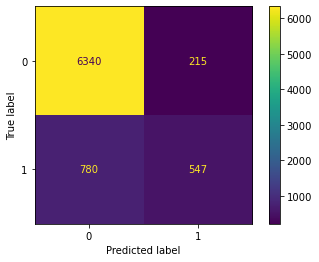

In [297]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,x_train_scaled,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.74      0.39      0.51       569

    accuracy                           0.87      3378
   macro avg       0.82      0.68      0.72      3378
weighted avg       0.86      0.87      0.86      3378
 



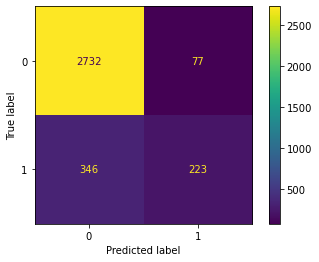

In [298]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,x_test_scaled,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## Linear Discriminant Analysis

In [299]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

In [300]:
#Build LDA Model
lda= LinearDiscriminantAnalysis()
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
}
grid_search = GridSearchCV(estimator = lda,scoring='accuracy',return_train_score=True, param_grid = param_grid, cv = 10) # cv in hyperparameters is the cross validation where the effect of loss of pattern for splitting the data in trainig and testing previously is compensated by dividing the data passed in the model in number of subsets as specified by using one of the subsets as test and the other subsets as training in the same number of iterations in this case which is 10.

###### #The cross validation is used to solve the overfitting problem which can be caused by direct train test split, it can solve the grredy algorithm problem.

In [301]:
grid_search.fit(x_train_scaled, y_train) #fitting the gridsearch method on the training data.

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             return_train_score=True, scoring='accuracy')

In [302]:
grid_search.best_score_

0.8651369078638383

In [303]:
print(grid_search.best_params_)# the best hyper parametrs

{'solver': 'lsqr'}


In [304]:
best_grid = grid_search.best_estimator_ #the best LDA model using the best hyper parametrs saved in an object.
best_grid

LinearDiscriminantAnalysis(solver='lsqr')

In [305]:
ytrain_predict = best_grid.predict(x_train_scaled)# Prediction on Training and Test data using the best estimator by gridsearch.
ytest_predict = best_grid.predict(x_test_scaled)

#### Evaluation of model

In [306]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix #importing all the model performance evalution metrics.

<AxesSubplot:>

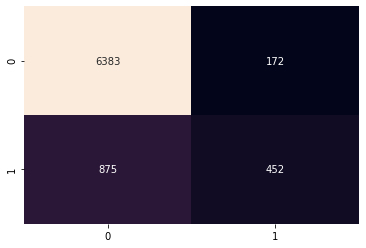

In [307]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='d',cbar=False)

#### AUC and ROC for the training data

In [308]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6555
           1       0.72      0.34      0.46      1327

    accuracy                           0.87      7882
   macro avg       0.80      0.66      0.69      7882
weighted avg       0.85      0.87      0.85      7882



AUC: 0.859


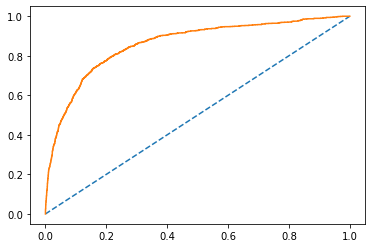

In [309]:
# predict probabilities
probs = best_grid.predict_proba(x_train_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculating roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

<AxesSubplot:>

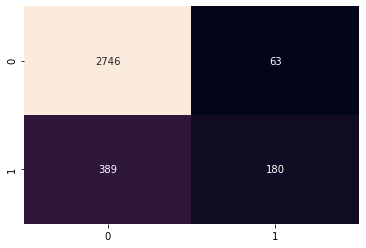

In [310]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)

#### ROC-AUC CURVE AND SCORE ON TEST DATA

In [311]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2809
           1       0.74      0.32      0.44       569

    accuracy                           0.87      3378
   macro avg       0.81      0.65      0.68      3378
weighted avg       0.85      0.87      0.84      3378



AUC: 0.840


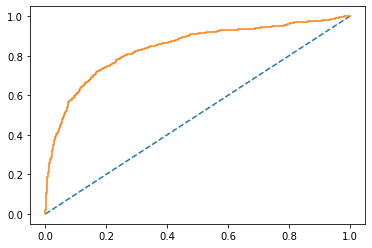

In [312]:
# predict probabilities
probs = best_grid.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculating roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

## NAIVE BAYES

In [313]:
from sklearn.naive_bayes import GaussianNB

In [314]:
NB_model = GaussianNB()
NB_model.fit(x_train_scaled, y_train)

GaussianNB()

In [315]:
from sklearn.model_selection import cross_val_score #cross-validation check seperately 
scores = cross_val_score(NB_model, x_train_scaled, y_train, cv=10) #fitting the best grid in the cross validation with 10 folds.
scores.mean()

0.8648819748702012

In [316]:
scores = cross_val_score(NB_model, x_test_scaled, y_test, cv=10) #fitting the best grid in the cross validation with 10 folds.
scores.mean()

0.8635234316014959

#### Evaluation Metrics on training data¶

0.8656432377569145
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6555
           1       0.64      0.46      0.53      1327

    accuracy                           0.87      7882
   macro avg       0.77      0.70      0.73      7882
weighted avg       0.85      0.87      0.86      7882



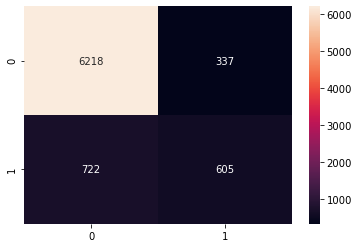

In [317]:
## Performance Matrix on train data set
y_train_predict_NB = NB_model.predict(x_train_scaled) #predicting the labels of traing data.
model_score = NB_model.score(x_train_scaled, y_train) #accuracy score of the trainig data.
print(model_score)
sns.heatmap(confusion_matrix(y_train, y_train_predict_NB),annot=True,fmt='d') #visual representation of classification matrix.
print(classification_report(y_train, y_train_predict_NB)) #classification report.

#### ROC-AUC for training data

AUC: 0.839


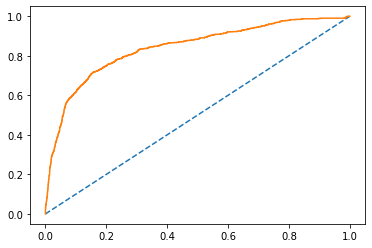

In [318]:
# predict probabilities
probs = NB_model.predict_proba(x_train_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# calculating roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)

#### Evaluation Metrics on test data

0.8679692125518058
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2809
           1       0.66      0.44      0.53       569

    accuracy                           0.87      3378
   macro avg       0.78      0.70      0.73      3378
weighted avg       0.85      0.87      0.86      3378



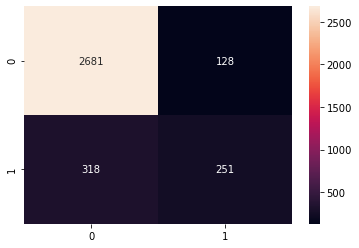

In [319]:
## Performance Matrix on train data set
y_test_predict_NB = NB_model.predict(x_test_scaled)
model_score = NB_model.score(x_test_scaled, y_test)
print(model_score)
sns.heatmap(confusion_matrix(y_test, y_test_predict_NB),annot=True,fmt='d')
print(classification_report(y_test, y_test_predict_NB))

#### ROC-AUC for testing data

AUC: 0.814


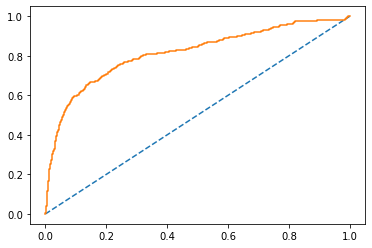

In [320]:
# predict probabilities
probs = NB_model.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculating roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)

## KNN model

In [321]:
from sklearn.neighbors import KNeighborsClassifier

In [322]:
# empty list that will hold accuracy scores,,Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.04203670811130844,
 0.05476613380698636,
 0.06305506216696266,
 0.07519242155121375,
 0.0849615156897573,
 0.09532267613972767,
 0.10213143872113672,
 0.10834813499111906,
 0.11130846654825344,
 0.11841326228537596]

#### Plot misclassification error vs k (with k value on X-axis)

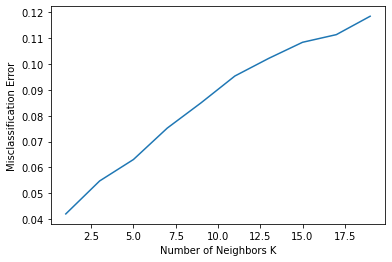

In [323]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [324]:
KNN= KNeighborsClassifier()
grid={'n_neighbors':list(range(1,20,2))}
#using gridsearch method to find out best hyper-parameters. This is another method to find out the best hyperparameters. 

In [325]:
grid_search_KNN = GridSearchCV(estimator =KNN, param_grid = grid,scoring='accuracy' ,return_train_score=True,cv =10,n_jobs=-1)

In [326]:
grid_search_KNN.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             return_train_score=True, scoring='accuracy')

In [327]:
grid_search_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [328]:
best_grid_KNN=grid_search_KNN.best_estimator_

In [329]:
best_grid_KNN

KNeighborsClassifier(n_neighbors=1)

In [330]:
ytrain_predict_KNN = best_grid_KNN.predict(x_train_scaled)# Prediction on Training and Test data using the best estimator by gridsearch.
ytest_predict_KNN = best_grid_KNN.predict(x_test_scaled)

#### Evaluation on training data

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



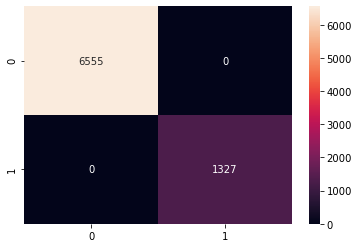

In [331]:
model_score_KNN = best_grid_KNN.score(x_train_scaled, y_train)
print(model_score_KNN)
sns.heatmap(confusion_matrix(y_train, ytrain_predict_KNN),annot=True,fmt='d')
print(classification_report(y_train, ytrain_predict_KNN))

#### ROC-AUC on training

AUC: 1.000


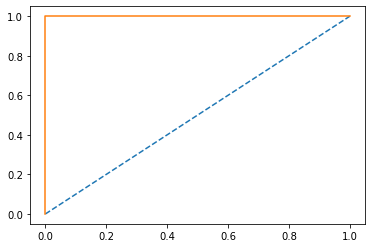

In [332]:
# predict probabilities
probs = best_grid_KNN.predict_proba(x_train_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
KNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculating roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)

#### Evaluation on Testing Data

0.9579632918886916
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2809
           1       0.87      0.88      0.88       569

    accuracy                           0.96      3378
   macro avg       0.92      0.93      0.93      3378
weighted avg       0.96      0.96      0.96      3378



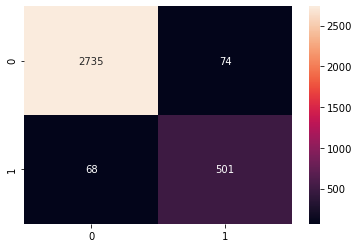

In [333]:
model_score_KNN = best_grid_KNN.score(x_test_scaled, y_test)
print(model_score_KNN)
sns.heatmap(confusion_matrix(y_test, ytest_predict_KNN),annot=True,fmt='d')
print(classification_report(y_test, ytest_predict_KNN))

#### ROC-AUC on testing Data

AUC: 0.927


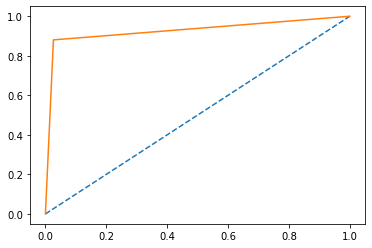

In [334]:
# predict probabilities
probs = best_grid_KNN.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculating roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)

## Decision Tree

In [335]:
from sklearn.tree import DecisionTreeClassifier

In [336]:
param_grid = {
    'criterion': ['gini'], #selection criteria for the independent variables to be used in formimg the nodes.
    'max_depth': [8,7,10,20], #pruning the tree with extra leaves to the number of levels passed in the list, pruning is done to tone down the overgrowth of the decision tree with unhealthy leaves having very low number of samples with affects the prediction.
    'min_samples_leaf': [50,100,150], # minimum number of samples allowed in the leaf nodes.
    'min_samples_split': [150,300,450], #mimimum number samples allowed in the nodes about to split, below these numbers the nodes won't split further.
}

dtcl = DecisionTreeClassifier(random_state=1) #decision tree classifier model.

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10) # cv in hyperparameters is the cross validation where the effect of loss of pattern for splitting the data in trainig and testing previously is compensated by dividing the data passed in the model in number of subsets as specified by using one of the subsets as test and the other subsets as training in the same number of iterations in this case which is 10.

In [337]:
grid_search.fit(x_train, y_train) #fitting the gridsearch method on the training data.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [8, 7, 10, 20],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [338]:
print(grid_search.best_params_) #the best hyperparameters calculated by the gridsearch.

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 50, 'min_samples_split': 150}


In [339]:
best_grid = grid_search.best_estimator_ #the best estimator decision tree model using the best hyper parametrs.
best_grid

DecisionTreeClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [340]:
ytrain_predict_dt = best_grid.predict(x_train)# Prediction on Training and Test data using the best estimator by gridsearch.
ytest_predict_dt = best_grid.predict(x_test)

#### Evaluation on training data

0.8919056077137782
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6555
           1       0.72      0.58      0.65      1327

    accuracy                           0.89      7882
   macro avg       0.82      0.77      0.79      7882
weighted avg       0.89      0.89      0.89      7882



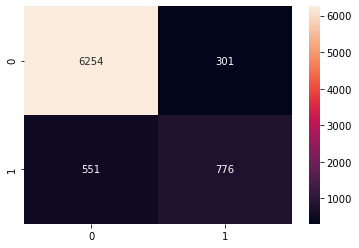

In [341]:
model_score_DT = best_grid.score(x_train, y_train)
print(model_score_DT)
sns.heatmap(confusion_matrix(y_train, ytrain_predict_dt),annot=True,fmt='d')
print(classification_report(y_train, ytrain_predict_dt))

#### ROC-AUC on training

AUC: 0.929


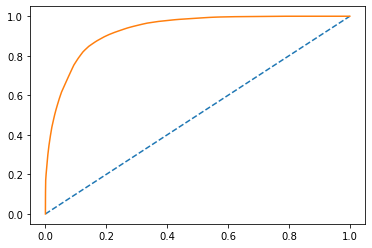

In [342]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
DT_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % DT_train_auc)
# calculating roc curve
DT_train_fpr, DT_train_tpr, DT_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_train_fpr, DT_train_tpr)

#### Evaluation on Testing Data

0.8845470692717584
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2809
           1       0.70      0.56      0.62       569

    accuracy                           0.88      3378
   macro avg       0.81      0.75      0.78      3378
weighted avg       0.88      0.88      0.88      3378



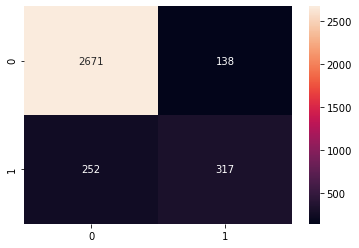

In [343]:
model_score_DT = best_grid.score(x_test, y_test)
print(model_score_DT)
sns.heatmap(confusion_matrix(y_test, ytest_predict_dt),annot=True,fmt='d')
print(classification_report(y_test, ytest_predict_dt))

#### ROC-AUC on testing Data

AUC: 0.906


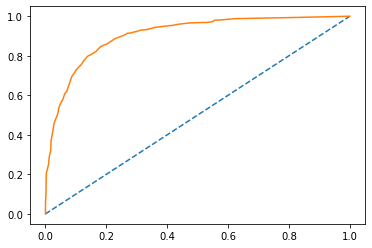

In [344]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
DT_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % DT_test_auc)
# calculating roc curve
DT_test_fpr, DT_test_tpr, DT_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_test_fpr, DT_test_tpr)

## Random Forest Classifier

In [345]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [5,7,10], #pruning every tree created by each of the estimators with replacemnet in ensembling.
    'max_features': [5,6,8], # maximum features or number variables to choose from for an estimator.
    'min_samples_leaf': [50,100,150], #same logic as the decision tree
    'min_samples_split': [150,300,450],
    'n_estimators': [100,200,300] # number of estimators or trees from which the prediction of classes will be decided by the priciple of majority vote for classification problems or the number of trees.
}
rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [346]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [5, 6, 8],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450],
                         'n_estimators': [100, 200, 300]})

In [347]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 300}

In [348]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=7, max_features=6, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=300, random_state=1)

In [349]:
ytrain_predict_RF = best_grid.predict(x_train)# Prediction on Training and Test data using the best estimator by gridsearch.
ytest_predict_RF = best_grid.predict(x_test)

#### Evaluation on training data

0.8965998477543771
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.76      0.56      0.65      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.76      0.79      7882
weighted avg       0.89      0.90      0.89      7882



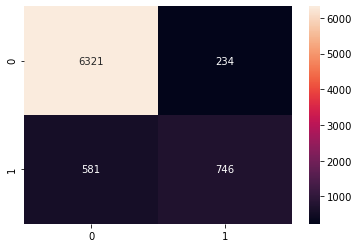

In [350]:
model_score_RF = best_grid.score(x_train, y_train)
print(model_score_RF)
sns.heatmap(confusion_matrix(y_train, ytrain_predict_RF),annot=True,fmt='d')
print(classification_report(y_train, ytrain_predict_RF))

#### ROC-AUC on training

AUC: 0.931


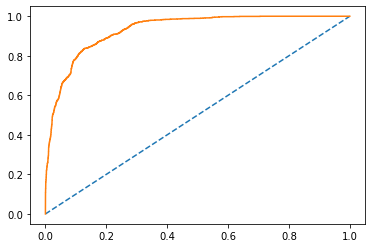

In [351]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
RF_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RF_train_auc)
# calculating roc curve
RF_train_fpr, RF_train_tpr, RF_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr)

#### Evaluation on test data

0.8919478981645944
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.76      0.52      0.62       569

    accuracy                           0.89      3378
   macro avg       0.84      0.74      0.78      3378
weighted avg       0.88      0.89      0.88      3378



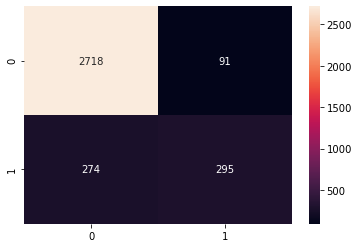

In [352]:
model_score_RF = best_grid.score(x_test, y_test)
print(model_score_RF)
sns.heatmap(confusion_matrix(y_test, ytest_predict_RF),annot=True,fmt='d')
print(classification_report(y_test, ytest_predict_RF))

#### ROC-AUC on testing

AUC: 0.916


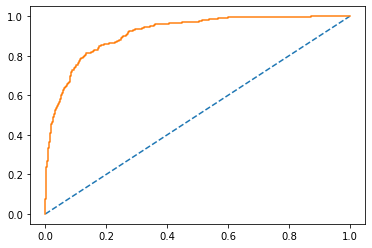

In [353]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_test_auc)
# calculating roc curve
RF_test_fpr, RF_test_tpr, RF_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr)

## Bagging

In [354]:
from sklearn.ensemble import BaggingClassifier
rfcl = RandomForestClassifier(random_state=1)
Bagging_model=BaggingClassifier(base_estimator=best_grid,n_estimators=100,random_state=1)
Bagging_model.fit(x_train_scaled, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        max_features=6,
                                                        min_samples_leaf=50,
                                                        min_samples_split=150,
                                                        n_estimators=300,
                                                        random_state=1),
                  n_estimators=100, random_state=1)

In [355]:
ytrain_predict_BAG = Bagging_model.predict(x_train_scaled)# Prediction on Training and Test data using the best estimator by gridsearch.
ytest_predict_BAG = Bagging_model.predict(x_test_scaled)

#### Evaluation on training data

0.8908906368941893
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.76      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882



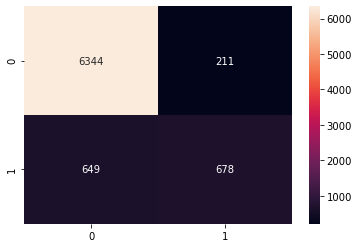

In [356]:
model_score_BAG = Bagging_model.score(x_train_scaled, y_train)
print(model_score_BAG)
sns.heatmap(confusion_matrix(y_train, ytrain_predict_BAG),annot=True,fmt='d')
print(classification_report(y_train, ytrain_predict_BAG))

#### ROC-AUC on training

AUC: 0.920


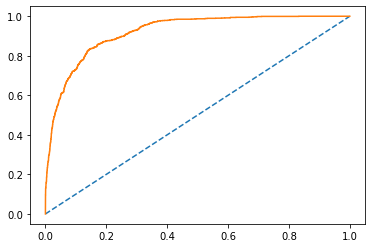

In [357]:
# predict probabilities
probs = Bagging_model.predict_proba(x_train_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
BAG_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % BAG_train_auc)
# calculating roc curve
BAG_train_fpr, BAG_train_tpr, BAG_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BAG_train_fpr, BAG_train_tpr)

#### Evaluation on test data

0.88898756660746
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.77      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



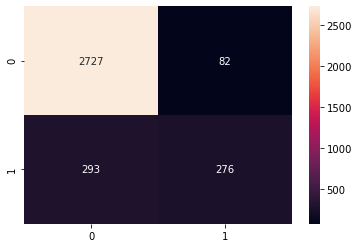

In [358]:
model_score_BAG = Bagging_model.score(x_test_scaled, y_test)
print(model_score_BAG)
sns.heatmap(confusion_matrix(y_test, ytest_predict_BAG),annot=True,fmt='d')
print(classification_report(y_test, ytest_predict_BAG))

#### ROC-AUC on testing

AUC: 0.906


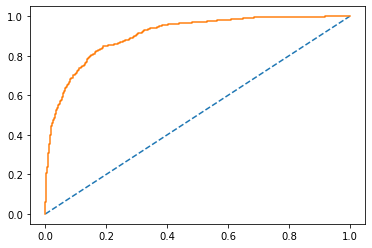

In [359]:
# predict probabilities
probs = Bagging_model.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
BAG_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % BAG_test_auc)
# calculating roc curve
BAG_test_fpr, BAG_test_tpr, BAG_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BAG_test_fpr, BAG_test_tpr)

## Ada Boost

In [360]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train_scaled,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

#### Evaluation on training data

0.8977416899264146
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.75      0.60      0.66      1327

    accuracy                           0.90      7882
   macro avg       0.83      0.78      0.80      7882
weighted avg       0.89      0.90      0.89      7882



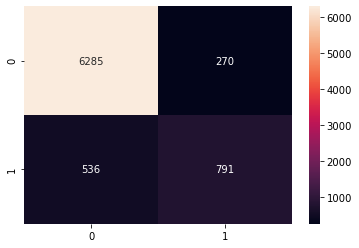

In [361]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train_scaled)
model_score = ADB_model.score(x_train_scaled, y_train)
print(model_score)
sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True,fmt='d')
print(classification_report(y_train, y_train_predict))

#### ROC-AUC on training

AUC: 0.919


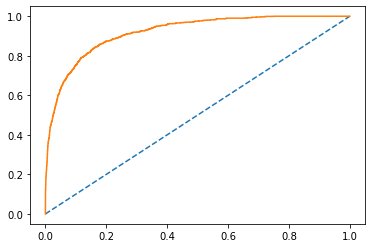

In [362]:
# predict probabilities
probs = ADB_model.predict_proba(x_train_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
ADB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ADB_train_auc)
# calculating roc curve
ADB_train_fpr, ADB_train_tpr, ADB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr)

#### Evaluation on test data

0.8987566607460036
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.75      0.60      0.67       569

    accuracy                           0.90      3378
   macro avg       0.83      0.78      0.80      3378
weighted avg       0.89      0.90      0.89      3378



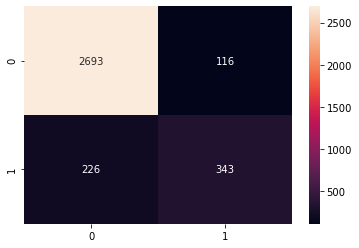

In [363]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test_scaled)
model_score = ADB_model.score(x_test_scaled, y_test)
print(model_score)
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt='d')
print(classification_report(y_test, y_test_predict))

#### ROC-AUC on testing

AUC: 0.907


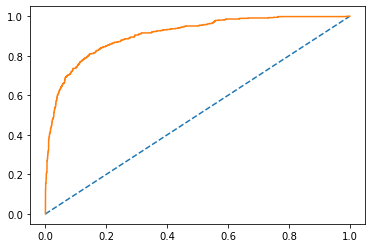

In [364]:
#predict probabilities
probs = ADB_model.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
ADB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ADB_test_auc)
# calculating roc curve
ADB_test_fpr, ADB_test_tpr, ADB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr)

## Gradient Boost

In [365]:
from sklearn.ensemble import GradientBoostingClassifier

In [366]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train_scaled, y_train)

#### Evaluation on training data

0.9162649073839128
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6555
           1       0.83      0.63      0.72      1327

    accuracy                           0.92      7882
   macro avg       0.88      0.80      0.83      7882
weighted avg       0.91      0.92      0.91      7882



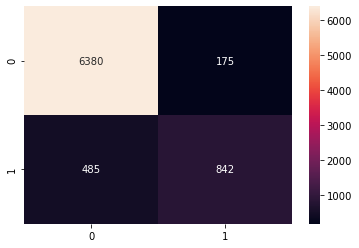

In [367]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(x_train_scaled)
model_score = gbcl.score(x_train_scaled, y_train)
print(model_score)
sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True,fmt='d')
print(classification_report(y_train, y_train_predict))

#### ROC-AUC on training

AUC: 0.947


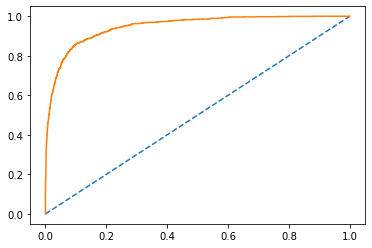

In [368]:
# predict probabilities
probs = gbcl.predict_proba(x_train_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
gbcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculating roc curve
gbcl_train_fpr, gbcl_train_tpr,gbcl_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr,gbcl_train_tpr)

#### Evaluation on test data

0.909117821195974
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2809
           1       0.81      0.60      0.69       569

    accuracy                           0.91      3378
   macro avg       0.87      0.78      0.82      3378
weighted avg       0.90      0.91      0.90      3378



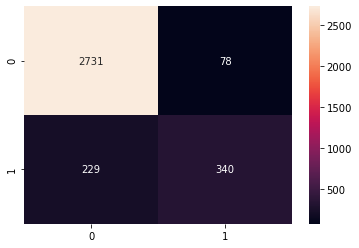

In [369]:
## Performance Matrix on train data set
y_test_predict = gbcl.predict(x_test_scaled)
model_score = gbcl.score(x_test_scaled, y_test)
print(model_score)
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt='d')
print(classification_report(y_test, y_test_predict))

#### ROC-AUC on testing

AUC: 0.931


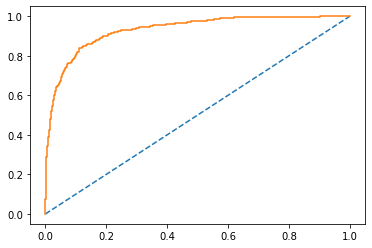

In [370]:
# predict probabilities
probs = gbcl.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
gbcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculating roc curve
gbcl_test_fpr, gbcl_test_tpr,gbcl_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr,gbcl_test_tpr)

#### Model selection bofore SMOTE

In [371]:
index=['LOGISTIC','LDA','NAIVE_BAYES','KNN','DECISION_TREE','RANDOM_FOREST','BAGGING','ADABOOST','GRADIENT_BOOST']
data = pd.DataFrame({'Train_Accuracy':[0.87,0.87,0.87,1.00,0.89,0.90,0.89,0.89,0.92],
        'Test_Accuracy':[0.87,0.87,0.87,0.96,0.88,0.89,0.89,0.90,0.91],
       'Train_AUC':[0.751,0.859,0.839,1.000,0.929,0.931,0.920,0.919,0.947],
        'Test_AUC':[0.751,0.840,0.814,0.927,0.906,0.916,0.906,0.907,0.931],
       },index=index) # model selection in tabular format.
round(data,2)

,Train_Accuracy,Test_Accuracy,Train_AUC,Test_AUC
LOGISTIC,0.87,0.87,0.75,0.75
LDA,0.87,0.87,0.86,0.84
NAIVE_BAYES,0.87,0.87,0.84,0.81
KNN,1.00,0.96,1.00,0.93
DECISION_TREE,0.89,0.88,0.93,0.91
RANDOM_FOREST,0.90,0.89,0.93,0.92
BAGGING,0.89,0.89,0.92,0.91
ADABOOST,0.89,0.90,0.92,0.91
GRADIENT_BOOST,0.92,0.91,0.95,0.93


In [372]:
index=['LOGISTIC','LDA','NAIVE_BAYES','KNN','DECISION_TREE','RANDOM_FOREST','BAGGING','ADABOOST','GRADIENT_BOOST']
data = pd.DataFrame({'Train_Recall':[0.41,0.34,0.46,1.00,0.58,0.56,0.51,0.60,0.63],
        'Test_Recall':[0.39,0.32,0.44,0.88,0.56,0.52,0.49,0.60,0.60],
       'Train_F1_score':[0.52,0.46,0.53,1.00,0.65,0.65,0.61,0.66,0.72],
       'Test_F1_score':[0.51,0.44,0.53,0.88,0.62,0.62,0.60,0.67,0.69],
       'Train_precision':[0.72,0.72,0.64,1.00,0.72,0.76,0.76,0.75,0.83],
       'Test_precision':[0.74,0.74,0.66,0.87,0.70,0.76,0.77,0.75,0.81],
       },index=index) # model selection in tabular format.
round(data,2)

,Train_Recall,Test_Recall,Train_F1_score,Test_F1_score,Train_precision,Test_precision
LOGISTIC,0.41,0.39,0.52,0.51,0.72,0.74
LDA,0.34,0.32,0.46,0.44,0.72,0.74
NAIVE_BAYES,0.46,0.44,0.53,0.53,0.64,0.66
KNN,1.00,0.88,1.00,0.88,1.00,0.87
DECISION_TREE,0.58,0.56,0.65,0.62,0.72,0.70
RANDOM_FOREST,0.56,0.52,0.65,0.62,0.76,0.76
BAGGING,0.51,0.49,0.61,0.60,0.76,0.77
ADABOOST,0.60,0.60,0.66,0.67,0.75,0.75
GRADIENT_BOOST,0.63,0.60,0.72,0.69,0.83,0.81


## SMOTE

In [373]:
!pip install imbalanced-learn

In [374]:
from imblearn.over_sampling import SMOTE

#### SMOTE is only applied on the train data set

In [375]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train_scaled, y_train.ravel())

In [376]:
## Let's check the shape after SMOTE
x_train_res.shape

(13110, 15)

## Naive Bayes with SMOTE

In [377]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(x_train_res, y_train_res)

GaussianNB()

#### Evaluation on training data

0.909117821195974
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      6555
           1       0.72      0.84      0.78      6555

    accuracy                           0.76     13110
   macro avg       0.77      0.76      0.76     13110
weighted avg       0.77      0.76      0.76     13110



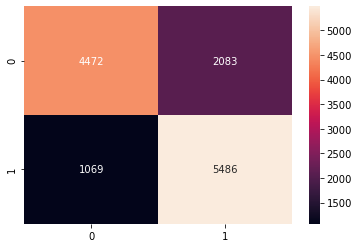

In [378]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(x_train_res)
NB_sm_train_model_score = NB_SM_model.score(x_train_res, y_train_res)
print(model_score)
sns.heatmap(confusion_matrix(y_train_res, y_train_predict),annot=True,fmt='d')
print(classification_report(y_train_res ,y_train_predict))

#### ROC-AUC on training

AUC: 0.843


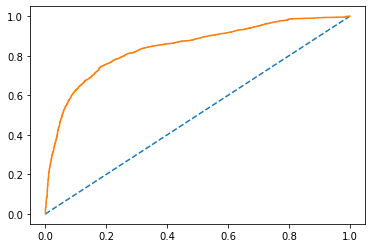

In [379]:
# predict probabilities
probs = NB_SM_model.predict_proba(x_train_res)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
NB_SM_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % NB_SM_train_auc)
# calculating roc curve
NB_SM_train_fpr, NB_SM_train_tpr,NB_SM_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_SM_train_fpr,NB_SM_train_tpr)

#### Evaluation on test data

0.909117821195974
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      2809
           1       0.33      0.78      0.47       569

    accuracy                           0.70      3378
   macro avg       0.64      0.73      0.63      3378
weighted avg       0.84      0.70      0.74      3378



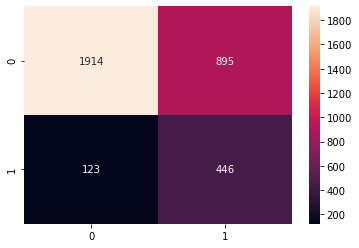

In [380]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(x_test_scaled)
NB_sm_test_model_score = NB_SM_model.score(x_test_scaled, y_test)
print(model_score)
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt='d')
print(classification_report(y_test, y_test_predict))

#### ROC-AUC on testing

AUC: 0.806


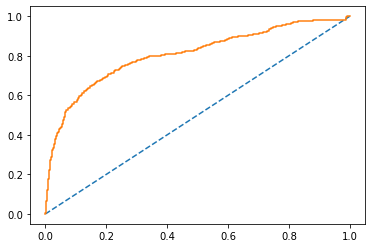

In [381]:
# predict probabilities
probs = NB_SM_model.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
NB_SM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_SM_test_auc)
# calculating roc curve
NB_SM_test_fpr, NB_SM_test_tpr,NB_SM_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_SM_test_fpr,NB_SM_test_tpr)

## logistic Regression with SMOTE

In [382]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'max_iter':[1000,5000,10000] ,         #using gridsearch method to find out best hyper-parameters.
      'tol':[0.0001,0.00001,0.001]}

In [383]:
SM_LR_model = LogisticRegression(n_jobs=2)

In [384]:
grid_search_1 = GridSearchCV(estimator = SM_LR_model, param_grid = grid,scoring='accuracy' ,return_train_score=True,cv =10,n_jobs=-1)

In [385]:
grid_search_1.fit(x_train_res, y_train_res) #fitting the grid on training data.

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=2), n_jobs=-1,
             param_grid={'max_iter': [1000, 5000, 10000],
                         'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.001]},
             return_train_score=True, scoring='accuracy')

In [386]:
best_grid_SM=grid_search_1.best_estimator_
best_grid_SM

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=0.001)

In [387]:
ytrain_predict_SM = best_grid_SM.predict(x_train_res)# Prediction on Training and Test data using the best estimator by gridsearch.
ytest_predict_SM = best_grid_SM.predict(x_test_scaled)

#### Evaluation on training data

0.909117821195974
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      6555
           1       0.79      0.83      0.81      6555

    accuracy                           0.80     13110
   macro avg       0.80      0.80      0.80     13110
weighted avg       0.80      0.80      0.80     13110



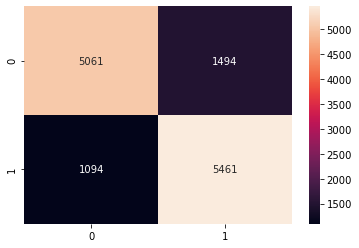

In [388]:
## Performance Matrix on train data set with SMOTE
lr_sm_train_model_score = best_grid_SM.score(x_train_res, y_train_res)
print(model_score)
sns.heatmap(confusion_matrix(y_train_res, ytrain_predict_SM),annot=True,fmt='d')
print(classification_report(y_train_res ,ytrain_predict_SM))

#### ROC-AUC on training

AUC: 0.874


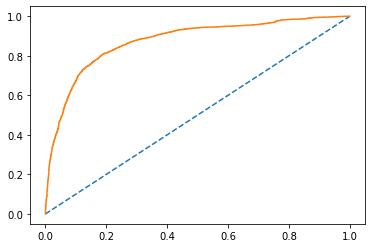

In [389]:
# predict probabilities
probs = best_grid_SM.predict_proba(x_train_res)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
lr_SM_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % lr_SM_train_auc)
# calculating roc curve
lr_SM_train_fpr, lr_SM_train_tpr,lr_SM_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_SM_train_fpr,lr_SM_train_tpr)

#### Evaluation on test data

0.909117821195974
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2809
           1       0.41      0.79      0.54       569

    accuracy                           0.78      3378
   macro avg       0.68      0.78      0.70      3378
weighted avg       0.86      0.78      0.80      3378



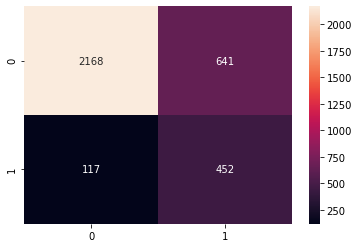

In [390]:
lr_sm_test_model_score = best_grid_SM.score(x_test_scaled, y_test)
print(model_score)
sns.heatmap(confusion_matrix(y_test, ytest_predict_SM),annot=True,fmt='d')
print(classification_report(y_test,ytest_predict_SM))

#### ROC-AUC on testing

AUC: 0.850


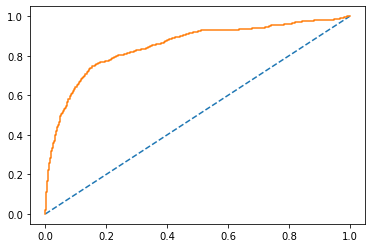

In [391]:
# predict probabilities on test data
probs = best_grid_SM.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
lr_SM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_SM_test_auc)
# calculating roc curve
lr_SM_test_fpr, lr_SM_test_tpr,lr_SM_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_SM_test_fpr,lr_SM_test_tpr)

## KNN With SMOTE

In [392]:
KNN_SM_model=KNeighborsClassifier(n_neighbors=17)
KNN_SM_model.fit(x_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=17)

#### Evaluation on training data

0.909117821195974
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      6555
           1       0.85      0.99      0.92      6555

    accuracy                           0.91     13110
   macro avg       0.92      0.91      0.91     13110
weighted avg       0.92      0.91      0.91     13110



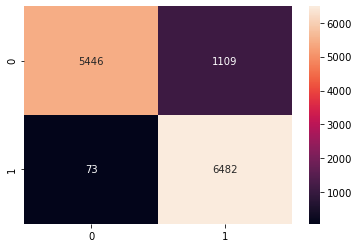

In [393]:
## Performance Matrix on train data set smote training data
y_train_predict = KNN_SM_model.predict(x_train_res)
KNN_sm_train_model_score = KNN_SM_model.score(x_train_res, y_train_res)
print(model_score)
sns.heatmap(confusion_matrix(y_train_res, y_train_predict),annot=True,fmt='d')
print(classification_report(y_train_res, y_train_predict))

#### ROC-AUC on training

AUC: 0.993


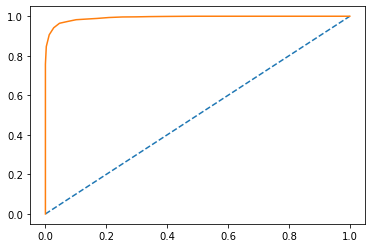

In [394]:
# predict probabilities on train data
probs = KNN_SM_model.predict_proba(x_train_res)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
KNN_SM_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % KNN_SM_train_auc)
# calculating roc curve
KNN_SM_train_fpr, KNN_SM_train_tpr,KNN_SM_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_SM_train_fpr,KNN_SM_train_tpr)

#### Evaluation on test data

0.909117821195974
              precision    recall  f1-score   support

           0       0.98      0.80      0.89      2809
           1       0.49      0.93      0.64       569

    accuracy                           0.83      3378
   macro avg       0.74      0.87      0.77      3378
weighted avg       0.90      0.83      0.84      3378



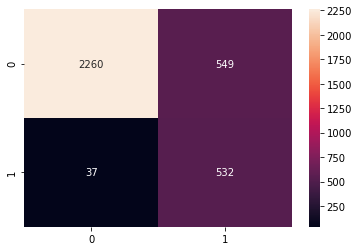

In [395]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(x_test_scaled)
KNN_sm_test_model_score = KNN_SM_model.score(x_test_scaled, y_test)
print(model_score)
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt='d')
print(classification_report(y_test, y_test_predict))

#### ROC-AUC on testing

AUC: 0.957


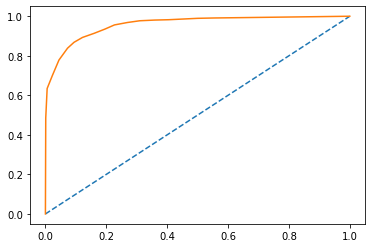

In [396]:
# predict probabilities
probs = KNN_SM_model.predict_proba(x_test_scaled)
# probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
KNN_SM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_SM_test_auc)
# calculating roc curve
KNN_SM_test_fpr, KNN_SM_test_tpr,KNN_SM_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_SM_test_fpr,KNN_SM_test_tpr)

In [397]:
index=['NAIVE_BAYES','LOGISTIC','KNN']
data = pd.DataFrame({'Train_Recall_Before_SMOTE':[0.46,0.41,1.00],
                     'Train_Recall_After_SMOTE':[0.72,0.83,0.99],
        'Test_Recall_Before_SMOTE':[0.44,0.39,0.88],
        'Test_Recall_After_SMOTE':[0.78,0.79,0.93],
       'Train_F1_score_Before_SMOTE':[0.53,0.52,1.00],
       'Train_F1_score_After_SMOTE':[0.78,0.81,0.92],
       'Test_F1_score_Before_SMOTE':[0.53,0.51,0.88],
       'Test_F1_score_After_SMOTE':[0.47,0.54,0.64],
       'Train_AUC-ROC_Before_SMOTE':[0.84,0.75,1.00],
       'Train_AUC-ROC_After_SMOTE':[0.843,0.874,0.993],
       'Test_AUC-ROC_Before_SMOTE':[0.81,0.75,0.93],
       'Test_AUC-ROC_After_SMOTE':[0.806,0.850,0.957],
       },index=index) # model selection in tabular format.
round(data,2).T

,NAIVE_BAYES,LOGISTIC,KNN
Train_Recall_Before_SMOTE,0.46,0.41,1.00
Train_Recall_After_SMOTE,0.72,0.83,0.99
Test_Recall_Before_SMOTE,0.44,0.39,0.88
Test_Recall_After_SMOTE,0.78,0.79,0.93
Train_F1_score_Before_SMOTE,0.53,0.52,1.00
Train_F1_score_After_SMOTE,0.78,0.81,0.92
Test_F1_score_Before_SMOTE,0.53,0.51,0.88
Test_F1_score_After_SMOTE,0.47,0.54,0.64
Train_AUC-ROC_Before_SMOTE,0.84,0.75,1.00
Train_AUC-ROC_After_SMOTE,0.84,0.87,0.99
